In [3]:
from random import Random

import pandas as pd

file_path = "Data/Train_data.csv"
df = pd.read_csv(file_path)

print(df.head())


   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   


In [6]:
from sklearn.preprocessing import LabelEncoder

categorial_columns = df.select_dtypes(include='object')

for col in categorial_columns:
    df[col] = LabelEncoder().fit_transform(df[col])
    
print(df.head)

<bound method NDFrame.head of        duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0             0              1       19     9        491          0     0   
1             0              2       41     9        146          0     0   
2             0              1       46     5          0          0     0   
3             0              1       22     9        232       8153     0   
4             0              1       22     9        199        420     0   
...         ...            ...      ...   ...        ...        ...   ...   
25187         0              1       16     2          0          0     0   
25188         0              1       19     9        334          0     0   
25189         0              1       46     1          0          0     0   
25190         0              1       38     5          0          0     0   
25191         0              1       17     5          0          0     0   

       wrong_fragment  urgent  hot  ...  dst_

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='class')
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf_m = RandomForestClassifier(n_estimators=100, random_state=42,max_depth=None)

rf_m.fit(X_train, y_train)   

RandomForestClassifier(random_state=42)

Accuracy: 0.9978170271879341
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2365
           1       1.00      1.00      1.00      2674

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039



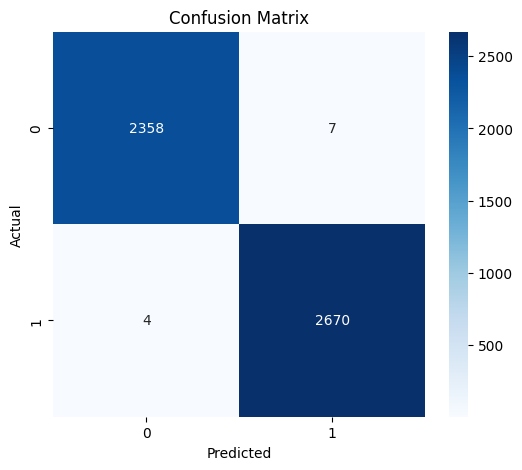

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = rf_m.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



In [13]:
import numpy as np

# Get feature importance
feature_importance = rf_m.feature_importances_
features = X.columns

# Sort by importance
sorted_indices = np.argsort(feature_importance)[::-1]

# Display
for i in sorted_indices:
    print(f"{features[i]}: {feature_importance[i]:.4f}")


src_bytes: 0.1915
dst_bytes: 0.1045
same_srv_rate: 0.0757
flag: 0.0687
dst_host_srv_count: 0.0671
dst_host_same_srv_rate: 0.0671
logged_in: 0.0426
diff_srv_rate: 0.0360
dst_host_same_src_port_rate: 0.0314
protocol_type: 0.0307
serror_rate: 0.0300
dst_host_diff_srv_rate: 0.0290
count: 0.0283
service: 0.0248
srv_serror_rate: 0.0245
dst_host_srv_diff_host_rate: 0.0214
dst_host_serror_rate: 0.0207
srv_count: 0.0180
dst_host_rerror_rate: 0.0162
dst_host_count: 0.0139
dst_host_srv_serror_rate: 0.0120
hot: 0.0102
dst_host_srv_rerror_rate: 0.0085
srv_rerror_rate: 0.0055
num_compromised: 0.0049
wrong_fragment: 0.0045
duration: 0.0038
rerror_rate: 0.0036
srv_diff_host_rate: 0.0026
is_guest_login: 0.0011
num_root: 0.0003
num_file_creations: 0.0002
root_shell: 0.0002
num_access_files: 0.0001
num_failed_logins: 0.0001
urgent: 0.0001
su_attempted: 0.0000
land: 0.0000
num_shells: 0.0000
num_outbound_cmds: 0.0000
is_host_login: 0.0000
